In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

Locations

In [2]:
np_lmd = [0, 0, 0.00000]
np_psi = [90, 0, 0.00000]
np_h = 0

sp_lmd = [0, 0, 0.00000]
sp_psi = [-90, -0, -0.00000]
sp_h = 0

pob_lmd = [128, 34, 12.34567]
pob_psi = [36, 12, 12.12345]
pob_h = 0

Generate random numbers with seeds to hold the values

In [3]:
np.random.seed(1234567)
lmd_dms = np.random.rand(8,3)
psi_dms = np.random.rand(8,3)
h = np.random.rand(8) * 50

In [4]:
h.ndim

1

set the limits of the random values for each octant

In [5]:
lmd_dms[:,0] = lmd_dms[:,0] * 90
lmd_dms[:,1] = lmd_dms[:,1] * 60
lmd_dms[:,2] = lmd_dms[:,2] * 60

psi_dms[:,0] = psi_dms[:,0] * 90
psi_dms[:,1] = psi_dms[:,1] * 60
psi_dms[:,2] = psi_dms[:,2] * 60

for i in range(4):
    lmd_dms[i,0] = lmd_dms[i,0] + 90*i
    lmd_dms[i+4,0] = lmd_dms[i+4,0] + 90*i
    
for i in range(4):
    psi_dms[i+4,0] = -psi_dms[i+4,0]
    psi_dms[i+4,1] = -psi_dms[i+4,1]
    psi_dms[i+4,2] = -psi_dms[i+4,2]

In [6]:
psi_dms

array([[ 11.82532043,   4.65619355,  50.45446765],
       [ 19.89054412,  45.17467735,  20.58138101],
       [  0.87753527,  23.74246847,  12.55680256],
       [ 42.12766926,  21.87602428,  35.70308455],
       [-82.23606447, -29.83180644, -20.8813531 ],
       [-32.67814354, -52.21732771, -23.08717613],
       [-72.31770745, -31.58786116,  -2.18418222],
       [-23.79417448,  -9.90960147, -14.2683992 ]])

In [7]:
lmd_dms.shape

(8, 3)

In [8]:
h.shape

(8,)

stack the arrays into a single array for each lmd, psi, h

In [9]:
lmd_dms = np.vstack((np_lmd, sp_lmd, pob_lmd, lmd_dms))
psi_dms = np.vstack((np_psi, sp_psi, pob_psi, psi_dms))
h = np.concatenate((np.array([np_h, sp_h, pob_h]), h))

In [10]:
names = ['NP', 'SP', 'PoB', '1', '2', '3', '4', '5', '6', '7', '8']

In [11]:
h.shape

(11,)

In [12]:
lmd_dms

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [128.        ,  34.        ,  12.34567   ],
       [ 21.33262516,   0.45890243,   1.1898185 ],
       [118.17833568,   5.96727985,  11.71045753],
       [198.65682198,   9.89587147,  42.71273752],
       [272.88600059,  11.84217711,  57.87341732],
       [ 51.65051206,  41.95365944,  58.47848528],
       [148.89154252,  15.65209588,  11.78457593],
       [257.53169898,  22.24354058,  22.13012886],
       [318.86223821,  40.96791233,  49.37256375]])

Make pandas data frame

In [13]:
sph = pd.DataFrame({
    'name': names,
    'lmd_dd': lmd_dms[:,0].astype(np.int),
    'lmd_mm': lmd_dms[:,1].astype(np.int),
    'lmd_ss': lmd_dms[:,2],
    'psi_dd': psi_dms[:,0].astype(np.int),
    'psi_mm': psi_dms[:,1].astype(np.int),
    'psi_ss': psi_dms[:,2],
    'h': h
})

In [14]:
sph.head(11)

,name,lmd_dd,lmd_mm,lmd_ss,psi_dd,psi_mm,psi_ss,h
0,NP,0,0,0.000000,90,0,0.000000,0.000000
1,SP,0,0,0.000000,-90,0,-0.000000,0.000000
2,PoB,128,34,12.345670,36,12,12.123450,0.000000
3,1,21,0,1.189819,11,4,50.454468,6.133314
4,2,118,5,11.710458,19,45,20.581381,34.131413
5,3,198,9,42.712738,0,23,12.556803,43.234554
6,4,272,11,57.873417,42,21,35.703085,4.451169
7,5,51,41,58.478485,-82,-29,-20.881353,5.234971
8,6,148,15,11.784576,-32,-52,-23.087176,49.110067
9,7,257,22,22.130129,-72,-31,-2.184182,10.893523


Print the locations in DMS format

In [15]:
print("name  \u03BB(deg)  \u03BB(min)    \u03BB(sec)   \u03C8(deg) \u03C8(min)   \u03C8(sec)     h(m)")
print("------------------------------------------------------------------")
for index, row in sph.iterrows():
    print("%3s %6d %7d %11.5f %7d %5d %11.5f %8.3f" % (row['name'], row['lmd_dd'], 
                                                     row['lmd_mm'], row['lmd_ss'],
                                                     row['psi_dd'], row['psi_mm'], 
                                                     row['psi_ss'], row['h']))
print("------------------------------------------------------------------")

name  λ(deg)  λ(min)    λ(sec)   ψ(deg) ψ(min)   ψ(sec)     h(m)
------------------------------------------------------------------
 NP      0       0     0.00000      90     0     0.00000    0.000
 SP      0       0     0.00000     -90     0    -0.00000    0.000
PoB    128      34    12.34567      36    12    12.12345    0.000
  1     21       0     1.18982      11     4    50.45447    6.133
  2    118       5    11.71046      19    45    20.58138   34.131
  3    198       9    42.71274       0    23    12.55680   43.235
  4    272      11    57.87342      42    21    35.70308    4.451
  5     51      41    58.47849     -82   -29   -20.88135    5.235
  6    148      15    11.78458     -32   -52   -23.08718   49.110
  7    257      22    22.13013     -72   -31    -2.18418   10.894
  8    318      40    49.37256     -23    -9   -14.26840    3.426
------------------------------------------------------------------


Create coordinate transformation function

In [16]:
def sph2xyz(l,p,h, R = 6371000):
    x = (R+h) * np.cos(p) * np.cos(l)
    y = (R+h) * np.cos(p) * np.sin(l)
    z = (R+h) * np.sin(p)
    
    return x,y,z

Convert DMS to decimal degrees

In [17]:
def dms2dd(dd, mm, ss):
    return dd + mm/60.0 + ss/3600.

Make array for lambda and psi in decimal degrees

In [18]:
x = np.zeros(11, dtype = np.float64)
y = np.zeros(11, dtype = np.float64)
z = np.zeros(11, dtype = np.float64)

psi_ddd = np.zeros(11, dtype=np.float64)

In [19]:
for index, row in sph.iterrows():
    lmd_dd = dms2dd(row['lmd_dd'], row['lmd_mm'], row['lmd_ss'])
    lmd_rad = lmd_dd * math.pi / 180.0
    
    psi_dd = dms2dd(row['psi_dd'], row['psi_mm'], row['psi_ss'])
    psi_rad = psi_dd * math.pi / 180.0
    
    psi_ddd[index] = psi_dd
    
    x[index], y[index], z[index] = sph2xyz(lmd_rad, psi_rad, row['h'])

In [20]:
xyz = pd.DataFrame({
    'name': names,
    'x': x,
    'y': y,
    'z': z
})

In [21]:
xyz.head(11)

,name,x,y,z
0,NP,3.901112e-10,0.000000e+00,6.371000e+06
1,SP,3.901112e-10,0.000000e+00,-6.371000e+06
2,PoB,-3.205220e+06,4.019410e+06,3.763051e+06
3,1,5.836951e+06,2.240634e+06,1.224451e+06
4,2,-2.822972e+06,5.289938e+06,2.153477e+06
5,3,-6.053498e+06,-1.985825e+06,4.301253e+04
6,4,1.806700e+05,-4.704238e+06,4.292691e+06
7,5,5.161450e+05,6.535430e+05,-6.316343e+06
8,6,-4.550298e+06,2.815450e+06,-3.458077e+06
9,7,-4.184054e+05,-1.867675e+06,-6.076718e+06


In [22]:
print("name        X(m)            Y(m)           Z(m)")
print("----------------------------------------------------")
for index, row in xyz.iterrows():
    print("%3s %15.3f %15.3f %15.3f" % (row['name'], row['x'], row['y'], row['z']))
print("----------------------------------------------------")

name        X(m)            Y(m)           Z(m)
----------------------------------------------------
 NP           0.000           0.000     6371000.000
 SP           0.000           0.000    -6371000.000
PoB    -3205219.570     4019409.981     3763050.879
  1     5836951.087     2240634.228     1224450.657
  2    -2822972.262     5289937.547     2153477.249
  3    -6053498.161    -1985825.228       43012.535
  4      180670.036    -4704238.347     4292691.188
  5      516145.010      653543.027    -6316342.577
  6    -4550297.614     2815450.089    -3458077.383
  7     -418405.421    -1867675.153    -6076718.377
  8     4399452.827    -3867683.631    -2505099.361
----------------------------------------------------


In [23]:
sph2 = sph.copy()

for index, row in sph2.iterrows():
    sph2.at[index, 'lmd_ss'] += 1.5
    sph2.at[index, 'psi_ss'] += 1.5
    sph2.at[index, 'h'] += 50

In [24]:
sph2.head(11)

,name,lmd_dd,lmd_mm,lmd_ss,psi_dd,psi_mm,psi_ss,h
0,NP,0,0,1.500000,90,0,1.500000,50.000000
1,SP,0,0,1.500000,-90,0,1.500000,50.000000
2,PoB,128,34,13.845670,36,12,13.623450,50.000000
3,1,21,0,2.689819,11,4,51.954468,56.133314
4,2,118,5,13.210458,19,45,22.081381,84.131413
5,3,198,9,44.212738,0,23,14.056803,93.234554
6,4,272,11,59.373417,42,21,37.203085,54.451169
7,5,51,41,59.978485,-82,-29,-19.381353,55.234971
8,6,148,15,13.284576,-32,-52,-21.587176,99.110067
9,7,257,22,23.630129,-72,-31,-0.684182,60.893523


In [25]:
x2 = np.zeros(11, dtype = np.float64)
y2 = np.zeros(11, dtype = np.float64)
z2 = np.zeros(11, dtype = np.float64)

In [26]:
for index, row in sph2.iterrows():
    lmd_dd = dms2dd(row['lmd_dd'], row['lmd_mm'], row['lmd_ss'])
    lmd_rad = lmd_dd * math.pi / 180.0
    
    psi_dd = dms2dd(row['psi_dd'], row['psi_mm'], row['psi_ss'])
    psi_rad = psi_dd * math.pi / 180.0
    
    x2[index], y2[index], z2[index] = sph2xyz(lmd_rad, psi_rad, row['h'])

In [27]:
xyz2 = pd.DataFrame({
    'name': names,
    'x': x2,
    'y': y2,
    'z': z2
})

In [28]:
xyz2.head(11)

,name,x,y,z
0,NP,-4.633158e+01,-3.369328e-04,6.371050e+06
1,SP,4.633158e+01,3.369328e-04,-6.371050e+06
2,PoB,-3.205257e+06,4.019397e+06,3.763118e+06
3,1,5.836972e+06,2.240691e+06,1.224506e+06
4,2,-2.823026e+06,5.289945e+06,2.153538e+06
5,3,-6.053531e+06,-1.985885e+06,4.305920e+04
6,4,1.807045e+05,-4.704243e+06,4.292759e+06
7,5,5.161728e+05,6.535880e+05,-6.316386e+06
8,6,-4.550375e+06,2.815452e+06,-3.458066e+06
9,7,-4.184048e+05,-1.867736e+06,-6.076752e+06


In [29]:
print("name        X(m)            Y(m)           Z(m)")
print("----------------------------------------------------")
for index, row in xyz2.iterrows():
    print("%3s %15.3f %15.3f %15.3f" % (row['name'], row['x'], row['y'], row['z']))
print("----------------------------------------------------")

name        X(m)            Y(m)           Z(m)
----------------------------------------------------
 NP         -46.332          -0.000     6371050.000
 SP          46.332           0.000    -6371050.000
PoB    -3205256.893     4019396.820     3763117.797
  1     5836972.288     2240691.069     1224505.734
  2    -2823025.513     5289944.716     2153537.754
  3    -6053530.930    -1985884.737       43059.203
  4      180704.466    -4704242.757     4292759.112
  5      516172.777      653587.958    -6316386.091
  6    -4550375.185     2815452.326    -3458065.608
  7     -418404.783    -1867735.976    -6076752.148
  8     4399529.163    -3867694.019    -2505076.421
----------------------------------------------------


In [30]:
dx = np.zeros(11, dtype = np.float64)
dy = np.zeros(11, dtype = np.float64)
dz = np.zeros(11, dtype = np.float64)

In [31]:
for i in range(11):
    dx[i] = xyz2.at[i, 'x'] - xyz.at[i, 'x']
    dy[i] = xyz2.at[i, 'y'] - xyz.at[i, 'y']
    dz[i] = xyz2.at[i, 'z'] - xyz.at[i, 'z']

In [32]:
for i in range(11):
    print("%12.3f %12.3f %12.3f" % (dx[i], dy[i], dz[i]))

     -46.332       -0.000       50.000
      46.332        0.000      -50.000
     -37.323      -13.161       66.919
      21.201       56.841       55.077
     -53.251        7.170       60.505
     -32.769      -59.510       46.668
      34.430       -4.410       67.925
      27.767       44.931      -43.515
     -77.571        2.236       11.774
       0.638      -60.823      -33.771
      76.336      -10.388       22.940


In [33]:
xyz_diff = np.zeros(11, dtype=np.float64)

for i in range(11):
    xyz_diff[i] = np.sqrt(dx[i]**2 + dy[i]**2 +dz[i]**2)

In [34]:
xyz_diff

array([68.16596468, 68.16596468, 77.74512087, 81.93846982, 80.91961714,
       82.42061516, 76.28018282, 68.43450579, 78.49109213, 69.57258212,
       80.38236319])

In [35]:
np.absolute(psi_ddd)

array([90.        , 90.        , 36.20336763, 11.0806818 , 19.75571705,
        0.38682133, 42.35991752, 82.48913371, 32.87307977, 72.51727338,
       23.15396344])

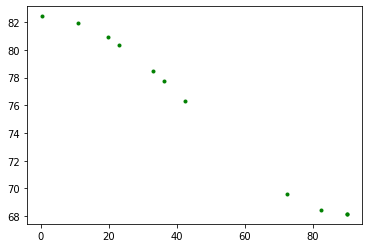

In [36]:
plt.plot(np.absolute(psi_ddd), xyz_diff, 'g.')